In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/data_balita.csv')
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
df.shape

(120999, 4)

In [ ]:
duplicates = df.duplicated().sum()

In [ ]:
df = df.drop_duplicates()

In [ ]:
print(f"Jumlah baris yang dihapus: {df}")

Jumlah baris yang dihapus:         Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0                  0     laki-laki          44.591973           stunted
1                  0     laki-laki          56.705203            tinggi
2                  0     laki-laki          46.863358            normal
3                  0     laki-laki          47.508026            normal
4                  0     laki-laki          42.743494  severely stunted
...              ...           ...                ...               ...
120959            60     perempuan         100.700000            normal
120967            60     perempuan         113.700000            normal
120968            60     perempuan         107.500000            normal
120972            60     perempuan         127.600000            tinggi
120993            60     perempuan         116.100000            normal

[39425 rows x 4 columns]


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Menampilkan distribusi awal
print(f"Distribusi kelas awal: {Counter(df['Status Gizi'])}")

# Encoding categorical features (karena SMOTE hanya bekerja dengan nilai numerik)
# df_encoded = pd.get_dummies(df, columns=['Jenis Kelamin','Status Gizi'])

# 1. Encode Categorical Variables
# Menggunakan LabelEncoder untuk mengonversi kategori menjadi angka
label_encoder_gender = LabelEncoder()
df['Jenis Kelamin'] = label_encoder_gender.fit_transform(df['Jenis Kelamin'])

label_encoder_status = LabelEncoder()
df['Status Gizi'] = label_encoder_status.fit_transform(df['Status Gizi'])

# Tampilkan beberapa baris pertama setelah encoding
print("\nData setelah encoding:")
print(df.head())

# 2. Normalize Numerical Features
# Inisialisasi Min-Max Scaler
minmax_scaler = MinMaxScaler()

df[['Tinggi Badan (cm)', 'Umur (bulan)']] = minmax_scaler.fit_transform(df[['Tinggi Badan (cm)', 'Umur (bulan)']])

# Tampilkan beberapa baris pertama setelah normalisasi
print("\nData setelah normalisasi:")
print(df.head())

# Pisahkan fitur dan label
X = df.drop(columns=['Status Gizi'],axis=1)
y = df['Status Gizi']

# Tampilkan dimensi dari X dan y
print("\nDimensi fitur dan label:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Tampilkan beberapa baris pertama dari X dan y
print("\nBeberapa baris pertama dari fitur:")
print(X.head())
print("\nBeberapa baris pertama dari label:")
print(y.head())

# Oversampling dengan SMOTE
#smote = SMOTE(random_state=42)
#X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Undersampling dengan Random Under Sampler
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
# Menampilkan distribusi awal
print(f"Distribusi kelas awal: {Counter(df['Status Gizi'])}")
# Menampilkan hasil distribusi setelah undersampling
print(f"Distribusi kelas setelah undersampling: {Counter(y_undersampled)}"

# Menampilkan hasil distribusi setelah oversampling dan undersampling
#print(f"Distribusi kelas setelah oversampling: {Counter(y_oversampled)}")
#print(f"Distribusi kelas setelah undersampling: {Counter(y_undersampled)}")

SyntaxError: incomplete input (<ipython-input-8-9ba3df2139d1>, line 62)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from collections import Counter
import pandas as pd

# Menampilkan distribusi awal
print(f"Distribusi kelas awal: {Counter(df['Status Gizi'])}")

# 1. Encode Categorical Variables
# Menggunakan LabelEncoder untuk mengonversi kategori menjadi angka
label_encoder_gender = LabelEncoder()
df['Jenis Kelamin'] = label_encoder_gender.fit_transform(df['Jenis Kelamin'])

label_encoder_status = LabelEncoder()
df['Status Gizi'] = label_encoder_status.fit_transform(df['Status Gizi'])

# Tampilkan mapping antara label asli dan label yang di-encode
status_mapping = dict(zip(label_encoder_status.classes_, label_encoder_status.transform(label_encoder_status.classes_)))
print("\nMapping Status Gizi (Original -> Encoded):")
print(status_mapping)

gender_mapping = dict(zip(label_encoder_gender.classes_, label_encoder_gender.transform(label_encoder_gender.classes_)))
print("\nMapping Jenis Kelamin (Original -> Encoded):")
print(gender_mapping)

# Tampilkan beberapa baris pertama setelah encoding
print("\nData setelah encoding:")
print(df.head())

# 2. Normalize Numerical Features
# Inisialisasi Min-Max Scaler
minmax_scaler = MinMaxScaler()

df[['Tinggi Badan (cm)', 'Umur (bulan)']] = minmax_scaler.fit_transform(df[['Tinggi Badan (cm)', 'Umur (bulan)']])

# Tampilkan beberapa baris pertama setelah normalisasi
print("\nData setelah normalisasi:")
print(df.head())

# Pisahkan fitur dan label
X = df.drop(columns=['Status Gizi'], axis=1)
y = df['Status Gizi']

# Tampilkan dimensi dari X dan y
print("\nDimensi fitur dan label:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Tampilkan beberapa baris pertama dari X dan y
print("\nBeberapa baris pertama dari fitur:")
print(X.head())
print("\nBeberapa baris pertama dari label:")
print(y.head())

# Undersampling dengan Random Under Sampler
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Menampilkan distribusi kelas setelah undersampling
print(f"\nDistribusi kelas setelah undersampling: {Counter(y_undersampled)}")

# Jika ingin menambahkan oversampling dengan SMOTE (tergantung pada langkah selanjutnya)
# smote = SMOTE(random_state=42)
# X_oversampled, y_oversampled = smote.fit_resample(X, y)
# print(f"\nDistribusi kelas setelah oversampling: {Counter(y_oversampled)}")

Distribusi kelas awal: Counter({'normal': 21514, 'tinggi': 6974, 'severely stunted': 6520, 'stunted': 4417})

Mapping Status Gizi (Original -> Encoded):
{'normal': 0, 'severely stunted': 1, 'stunted': 2, 'tinggi': 3}

Mapping Jenis Kelamin (Original -> Encoded):
{'laki-laki': 0, 'perempuan': 1}

Data setelah encoding:
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0             0              0          44.591973            2
1             0              0          56.705203            3
2             0              0          46.863358            0
3             0              0          47.508026            0
4             0              0          42.743494            1

Data setelah normalisasi:
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0           0.0              0           0.052069            2
1           0.0              0           0.189736            3
2           0.0              0           0.077883            0
3           0.0        

<ipython-input-9-0f74238cc970>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jenis Kelamin'] = label_encoder_gender.fit_transform(df['Jenis Kelamin'])
<ipython-input-9-0f74238cc970>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status Gizi'] = label_encoder_status.fit_transform(df['Status Gizi'])
<ipython-input-9-0f74238cc970>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
print(f"Distribusi kelas awal: {Counter(df['Status Gizi'])}")
print(f"Distribusi kelas setelah undersampling: {Counter(y_undersampled)}")

Distribusi kelas awal: Counter({0: 21514, 3: 6974, 1: 6520, 2: 4417})
Distribusi kelas setelah undersampling: Counter({0: 4417, 1: 4417, 2: 4417, 3: 4417})


In [ ]:
df.tail()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
120959,1.0,1,0.689736,0
120967,1.0,1,0.837481,0
120968,1.0,1,0.767018,0
120972,1.0,1,0.995454,3
120993,1.0,1,0.864757,0


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_undersampled,y_undersampled,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14134, 3)
y_train shape: (14134,)
X_test shape: (3534, 3)
y_test shape: (3534,)


In [ ]:
svm_model= SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred= svm_model.predict(X_test)

In [ ]:
print("SVM")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

SVM
Confusion Matrix:
[[673   9  97  91]
 [  0 838  63   0]
 [  0  67 822   0]
 [  0   0   0 874]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       870
           1       0.92      0.93      0.92       901
           2       0.84      0.92      0.88       889
           3       0.91      1.00      0.95       874

    accuracy                           0.91      3534
   macro avg       0.91      0.91      0.91      3534
weighted avg       0.91      0.91      0.91      3534



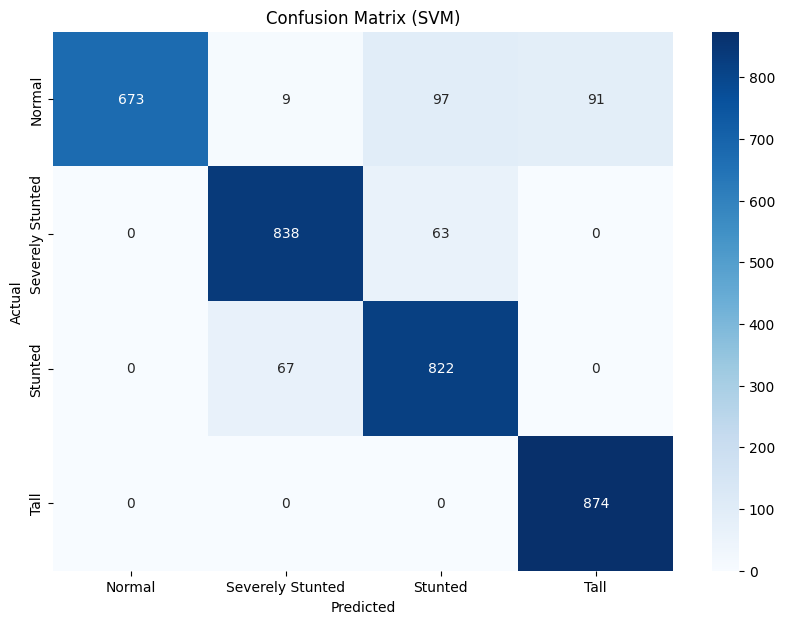

In [ ]:
# Plot the confusion matrix with the correct label order
plt.figure(figsize=(10, 7))

# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Reordering the labels based on the correct encoded values
labels = ['Normal', 'Severely Stunted', 'Stunted', 'Tall']  # Matches the encoding: 0, 1, 2, 3

# Plot the heatmap
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
svm_acc = accuracy_score(y_test, y_pred)
svm_prec = precision_score(y_test, y_pred, average=None)
svm_rec = recall_score(y_test, y_pred,average=None)
svm_f1 = f1_score(y_test, y_pred,average=None)
print(f'Accuracy SVM : {svm_acc}\nPrecision SVM : {svm_prec}\nRecall SVM : {svm_rec}\nF1 SVM : {svm_f1}')

Accuracy SVM : 0.9074702886247877
Precision SVM : [1.         0.91684902 0.83706721 0.90569948]
Recall SVM : [0.77356322 0.93007769 0.92463442 1.        ]
F1 SVM : [0.87232664 0.92341598 0.87867451 0.95051659]


In [ ]:
cv_scores_linear = cross_val_score(svm_model, X_train, y_train, cv=5)
print("\nCross-validation Scores (Linear Kernel):")
print(cv_scores_linear)
print(f"Mean CV Score (Linear Kernel): {cv_scores_linear.mean()}")


Cross-validation Scores (Linear Kernel):
[0.89812522 0.90166254 0.89812522 0.89954015 0.89879689]
Mean CV Score (Linear Kernel): 0.8992500033170187


In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest")
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Random Forest
Confusion Matrix (Random Forest):
[[848   0   6  16]
 [  0 876  25   0]
 [  1   6 882   0]
 [  6   0   0 868]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       870
           1       0.99      0.97      0.98       901
           2       0.97      0.99      0.98       889
           3       0.98      0.99      0.99       874

    accuracy                           0.98      3534
   macro avg       0.98      0.98      0.98      3534
weighted avg       0.98      0.98      0.98      3534



In [ ]:
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("\nCross-validation Scores (Random Forest):")
print(cv_scores_rf)
print(f"Mean CV Score (Random Forest): {cv_scores_rf.mean()}")


Cross-validation Scores (Random Forest):
[0.97736116 0.97842236 0.98372833 0.97912982 0.97806086]
Mean CV Score (Random Forest): 0.9793405066051228


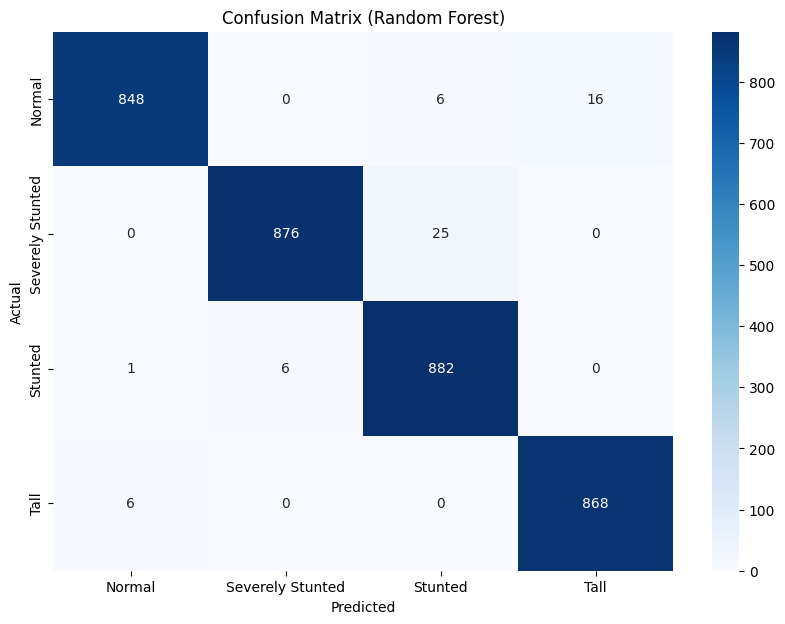

In [ ]:
plt.figure(figsize=(10, 7))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Reordering the labels based on the correct encoded values
labels = ['Normal', 'Severely Stunted', 'Stunted', 'Tall']  # Matches the encoding: 0, 1, 2, 3
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('svm_linear', svm_model),
    ('random_forest', rf_model)
], voting='soft')
voting_clf.fit(X_train, y_train)

# Prediksi menggunakan Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

In [ ]:
# Cetak confusion matrix
print("Voting Classifier")
print("Confusion Matrix (Voting Classifier):")
print(confusion_matrix(y_test, y_pred_voting))

# Cetak classification report
print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_voting))

Voting Classifier
Confusion Matrix (Voting Classifier):
[[846   0   6  18]
 [  0 859  42   0]
 [  4   1 884   0]
 [  4   0   0 870]]

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       870
           1       1.00      0.95      0.98       901
           2       0.95      0.99      0.97       889
           3       0.98      1.00      0.99       874

    accuracy                           0.98      3534
   macro avg       0.98      0.98      0.98      3534
weighted avg       0.98      0.98      0.98      3534



In [ ]:
cv_scores_voting = cross_val_score(voting_clf, X_train, y_train, cv=5)
print("\nCross-validation Scores (Voting Classifier):")
print(cv_scores_voting)
print(f"Mean CV Score (Voting Classifier): {cv_scores_voting.mean()}")


Cross-validation Scores (Voting Classifier):
[0.97700743 0.97842236 0.97877609 0.98125221 0.97735315]
Mean CV Score (Voting Classifier): 0.978562246420186


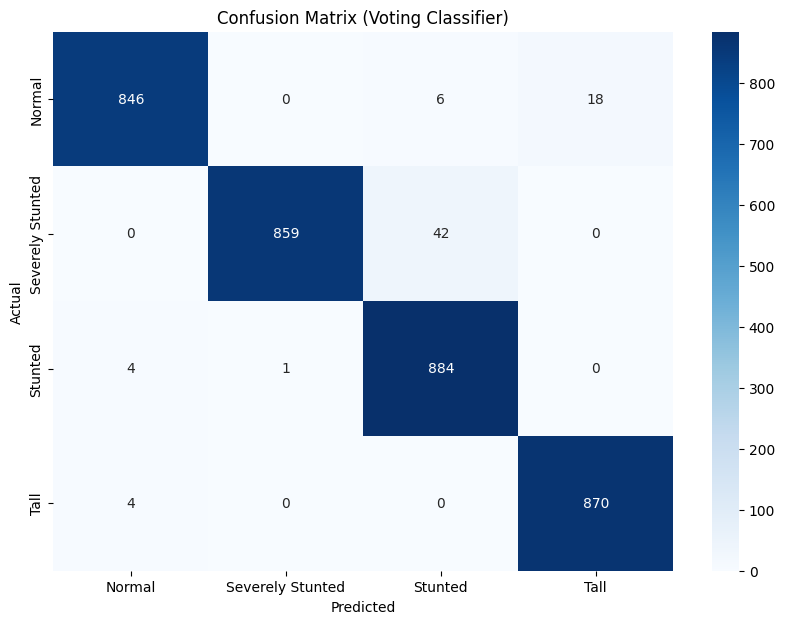

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix untuk Voting Classifier
plt.figure(figsize=(10, 7))

# Hitung confusion matrix untuk Voting Classifier
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Reordering the labels based on the correct encoded values
labels = ['Normal', 'Severely Stunted', 'Stunted', 'Tall']  # Matches the encoding: 0, 1, 2, 3

# Buat heatmap untuk confusion matrix
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Tambahkan label dan judul pada plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Voting Classifier)')

# Tampilkan plot
plt.show()

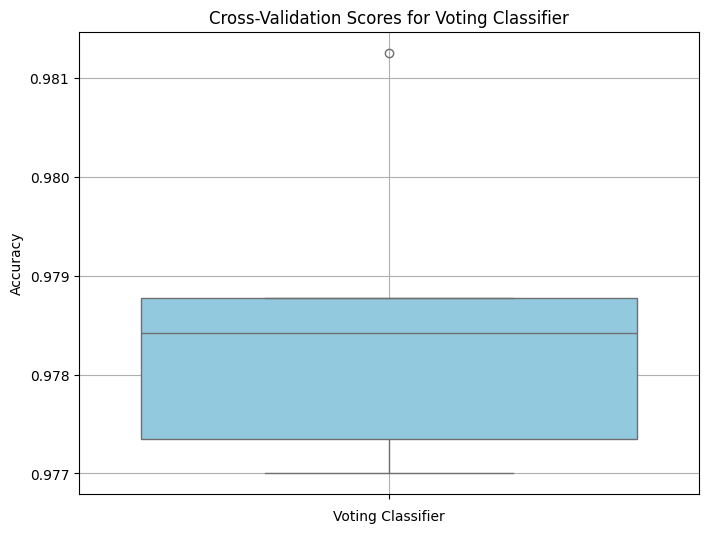


Cross-validation Scores (Voting Classifier):
[0.97700743 0.97842236 0.97877609 0.98125221 0.97735315]
Mean CV Score (Voting Classifier): 0.978562246420186


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendapatkan hasil cross-validation
cv_scores_voting = cross_val_score(voting_clf, X_train, y_train, cv=5)

# Membuat plot boxplot untuk visualisasi hasil cross-validation
plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores_voting, color='skyblue')
plt.title('Cross-Validation Scores for Voting Classifier')
plt.ylabel('Accuracy')
plt.xlabel('Voting Classifier')
plt.grid(True)
plt.show()

# Menampilkan nilai-nilai skor cross-validation dan rata-ratanya
print("\nCross-validation Scores (Voting Classifier):")
print(cv_scores_voting)
print(f"Mean CV Score (Voting Classifier): {cv_scores_voting.mean()}")


In [ ]:
import numpy as np
# Testing model
test = pd.DataFrame({'Umur (bulan)': [17], 'Jenis Kelamin': [1], 'Tinggi Badan (cm)': [90.4]})

pred =voting_clf.predict(test)
print("Predicted Score = {}".format(np.array(pred)))

Predicted Score = [3]


In [ ]:
import joblib

# Save the model
joblib.dump(voting_clf, 'voting_classifier_model.pkl')

['voting_classifier_model.pkl']

Playground

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Gunakan model dengan parameter terbaik
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.990266328471782


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi pada data pengujian
y_pred = best_rf.predict(X_test)

# Tampilkan Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Tampilkan Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4313    0   16   10]
 [   0 1320   10    0]
 [   8   19  811    0]
 [  17    0    0 1361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4339
           1       0.99      0.99      0.99      1330
           2       0.97      0.97      0.97       838
           3       0.99      0.99      0.99      1378

    accuracy                           0.99      7885
   macro avg       0.99      0.99      0.99      7885
weighted avg       0.99      0.99      0.99      7885



In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-validation Scores: [0.18414711 0.09752695 0.30424857 0.20240964 0.61597971]
Mean CV Score: 0.28086239695624604


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# membuat objek KNN dengan
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=5)

# melatih model KNN dengan data latih
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [ ]:
from sklearn.metrics import accuracy_score

# membuat prediksi dengan data uji
y_pred = knn.predict(X_test)

# menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model KNN:', accuracy)

Akurasi model KNN: 0.989854153455929


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('confusion_matrix knn:')
confusion_matrix(y_test, y_pred)

confusion_matrix knn:


array([[4309,    0,   14,   16],
       [   0, 1320,   10,    0],
       [  10,   16,  812,    0],
       [  14,    0,    0, 1364]])

In [ ]:
print(classification_report(y_test.values.reshape(-1, 1), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4339
           1       0.99      0.99      0.99      1330
           2       0.97      0.97      0.97       838
           3       0.99      0.99      0.99      1378

    accuracy                           0.99      7885
   macro avg       0.99      0.99      0.99      7885
weighted avg       0.99      0.99      0.99      7885



In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

print('Cross val: ', cross_val_score(knn, y_test.values.reshape(-1, 1), y_pred, cv = 5))
print('Accuracy : ', np.mean(cross_val_score(knn, y_test.values.reshape(-1, 1), y_pred)))

Cross val:  [0.98922004 0.99239062 0.98858592 0.99048827 0.98858592]
Accuracy :  0.9898541534559289


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

voting_clf = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn)
], voting='soft')
voting_clf.fit(X_train, y_train)

# Prediksi menggunakan Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

In [ ]:
# Cetak confusion matrix
print("Voting Classifier")
print("Confusion Matrix (Voting Classifier):")
print(confusion_matrix(y_test, y_pred_voting))

# Cetak classification report
print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_voting))

Voting Classifier
Confusion Matrix (Voting Classifier):
[[4285    0   30   24]
 [   0 1304   26    0]
 [  14   15  809    0]
 [   9    0    0 1369]]

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4339
           1       0.99      0.98      0.98      1330
           2       0.94      0.97      0.95       838
           3       0.98      0.99      0.99      1378

    accuracy                           0.99      7885
   macro avg       0.98      0.98      0.98      7885
weighted avg       0.99      0.99      0.99      7885



In [ ]:
cv_scores_voting = cross_val_score(voting_clf, X, y, cv=5)
print("\nCross-validation Scores (Voting Classifier):")
print(cv_scores_voting)
print(f"Mean CV Score (Voting Classifier): {cv_scores_voting.mean()}")


Cross-validation Scores (Voting Classifier):
[0.34711477 0.44311985 0.50095117 0.58287888 0.63208624]
Mean CV Score (Voting Classifier): 0.5012301838934686
